In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-03-28 08:22:16--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-03-28 08:22:16 (137 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset.shape

(1338, 7)

In [8]:
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
  dataset[col] = dataset[col].astype('category').cat.codes

In [9]:
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [10]:
train_dataset, test_dataset = np.split(dataset,[int(0.8*len(dataset))])

In [11]:
train_labels= train_dataset.pop('expenses')
test_labels= test_dataset.pop('expenses')


In [12]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [13]:
train_labels


0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1065     7045.50
1066     8978.19
1067     5757.41
1068    14349.85
1069    10928.85
Name: expenses, Length: 1070, dtype: float64

In [14]:

all_norm = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)
all_norm.adapt(np.array(train_dataset))

In [27]:
model = tf.keras.Sequential([
    all_norm,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])



In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mae',metrics=['mae','mse'])
model.fit(train_dataset,train_labels, epochs=75,validation_split=0.2)


Epoch 1/75
27/27 [==============================] - 1s 10ms/step - loss: 10638.7871 - mae: 10638.7871 - mse: 243649792.0000 - val_loss: 6569.4409 - val_mae: 6569.4409 - val_mse: 91089672.0000
Epoch 2/75
27/27 [==============================] - 0s 3ms/step - loss: 4166.8687 - mae: 4166.8687 - mse: 60001092.0000 - val_loss: 3905.1445 - val_mae: 3905.1445 - val_mse: 57657068.0000
Epoch 3/75
27/27 [==============================] - 0s 4ms/step - loss: 3326.0515 - mae: 3326.0515 - mse: 43298944.0000 - val_loss: 3792.7891 - val_mae: 3792.7891 - val_mse: 48864192.0000
Epoch 4/75
27/27 [==============================] - 0s 4ms/step - loss: 3145.0146 - mae: 3145.0146 - mse: 39749036.0000 - val_loss: 3507.8110 - val_mae: 3507.8110 - val_mse: 49768504.0000
Epoch 5/75
27/27 [==============================] - 0s 4ms/step - loss: 2952.9600 - mae: 2952.9600 - mse: 36158668.0000 - val_loss: 3274.4905 - val_mae: 3274.4905 - val_mse: 43302320.0000
Epoch 6/75
27/27 [==============================] - 0s 4

In [29]:
model.save('health_costs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 - 0s - loss: 2002.6700 - mae: 2002.6700 - mse: 24904044.0000 - 32ms/epoch - 4ms/step
Testing set Mean Abs Error: 2002.67 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


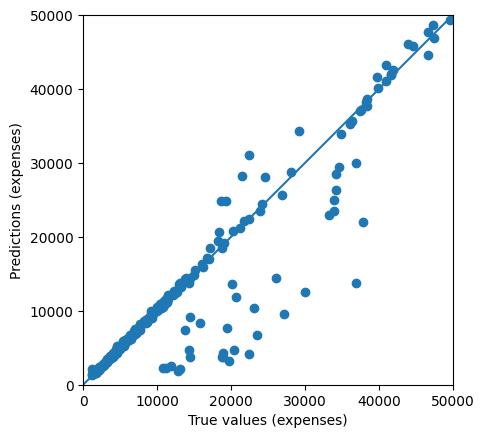

In [30]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
